In [1]:
import xarray as xr
import pickle
import pandas as pd
import numpy as np
import os
import datetime as dt
import glob
import netCDF4
import copy
import cfgrib

In [2]:
#combine the mrms machine learning CSV file with the regions pickle to allow for easy editing of the data.
df = pd.read_csv('/gpfs/fs1/home/ac.jcorner/NIU/Masters_Thesis/storm_data/hrrr/hrrr_preds_v3.csv')
pkl_data = pd.read_pickle('storm_data/hrrr/hrrr_storm_ids2.pkl')

result = df.merge(pkl_data, left_on='slice_id', right_on='uniq_id')
result

,slice_id,isolated_cell,multiple_isolated_cells,loosely_clustered_cells,tightly_clustered_cells,qlcs,tropical,uniq_id,area,convex_area,...,ymin,ymax,coords,geometry,start_year,start_month,start_day,start_hour,start_time,forecast_hour
0,hrrr20200601f30r0,0.884769,0.754559,0.013774,0.003351,3.874881e-05,0.017239,hrrr20200601f30r0,5287.5000,8662.5000,...,7,31,"[[7, 588], [8, 587], [8, 588], [8, 589], [8, 5...","POLYGON ((25.000 586.000, 8.000 587.000, 7.000...",2020,6,1,18,2020-06-01 18:30:00,30
1,hrrr20200601f30r1,0.850976,0.148710,0.000181,0.000059,6.439922e-07,0.000073,hrrr20200601f30r1,1040.6250,1251.5625,...,8,17,"[[8, 1148], [9, 1146], [9, 1147], [9, 1148], [...","POLYGON ((16.000 1137.000, 10.000 1143.000, 8....",2020,6,1,18,2020-06-01 18:30:00,30
2,hrrr20200601f30r10,0.815570,0.183374,0.000244,0.000258,1.507624e-05,0.000539,hrrr20200601f30r10,534.3750,632.8125,...,20,27,"[[20, 1072], [21, 1072], [21, 1073], [22, 1069...","POLYGON ((25.000 1066.000, 23.000 1067.000, 20...",2020,6,1,18,2020-06-01 18:30:00,30
3,hrrr20200601f30r100,0.747403,0.252368,0.000081,0.000077,1.128945e-06,0.000071,hrrr20200601f30r100,407.8125,450.0000,...,292,299,"[[292, 1149], [292, 1150], [293, 1149], [294, ...","POLYGON ((295.000 1147.000, 292.000 1149.000, ...",2020,6,1,18,2020-06-01 18:30:00,30
4,hrrr20200601f30r101,0.834906,0.164997,0.000055,0.000024,1.851806e-07,0.000017,hrrr20200601f30r101,660.9375,675.0000,...,297,305,"[[297, 469], [297, 470], [297, 471], [298, 468...","POLYGON ((301.000 465.000, 297.000 469.000, 29...",2020,6,1,18,2020-06-01 18:30:00,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65221,hrrr20200810f24r63887,0.757714,0.238551,0.010307,0.010619,1.221061e-03,0.031832,hrrr20200810f24r63887,506.2500,632.8125,...,1024,1034,"[[1024, 1096], [1024, 1097], [1024, 1098], [10...","POLYGON ((1024.000 1096.000, 1024.000 1098.000...",2020,8,10,0,2020-08-10 00:24:00,24
65222,hrrr20200810f24r63888,0.736977,0.226675,0.003818,0.009167,2.223100e-03,0.021139,hrrr20200810f24r63888,759.3750,914.0625,...,1028,1041,"[[1028, 1321], [1028, 1322], [1029, 1320], [10...","POLYGON ((1039.000 1316.000, 1032.000 1317.000...",2020,8,10,0,2020-08-10 00:24:00,24
65223,hrrr20200810f24r63889,0.825001,0.173489,0.000367,0.000378,2.277197e-05,0.000742,hrrr20200810f24r63889,379.6875,379.6875,...,1038,1042,"[[1038, 368], [1038, 369], [1038, 370], [1038,...","POLYGON ((1039.000 367.000, 1038.000 368.000, ...",2020,8,10,0,2020-08-10 00:24:00,24
65224,hrrr20200810f24r63890,0.744143,0.219045,0.003665,0.008401,1.961064e-03,0.022785,hrrr20200810f24r63890,351.5625,393.7500,...,1041,1048,"[[1041, 1119], [1042, 1119], [1042, 1120], [10...","POLYGON ((1041.000 1119.000, 1042.000 1121.000...",2020,8,10,0,2020-08-10 00:24:00,24


In [3]:
storm_dates = glob.glob('/lcrc/project/rainfall/jcorner/MODE_data/*')
storm_dates.sort()
storm_dates

['/lcrc/project/rainfall/jcorner/MODE_data/202006030000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006040000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006050000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006080000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006100000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006190000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006200000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006210000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006220000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006230000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006270000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006290000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202006300000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202007010000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202007030000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202007100000',
 '/lcrc/project/rainfall/jcorner/MODE_data/202007120000',
 '/lcrc/projec

In [4]:
storm_modes = ['multiple_isolated_cells', 'loosely_clustered_cells', 'tightly_clustered_cells', 'qlcs', 'isolated_cell']

day = 0
month = 0
hour = 0
fhour = 0

timesteps = []

for rid, row in result.iterrows():
    if row.start_month == month and row.start_day == day and row.forecast_hour == fhour:
        pass
    
    else:
        timesteps.append((row.start_month, row.start_day, row.start_hour, row.forecast_hour))
         
        day = row.start_day
        month = row.start_month
        hour = row.start_hour
        fhour = row.forecast_hour

# PLEASE USE THIS ONE FOR NOW 

In [6]:
storm_modes = ['multiple_isolated_cells', 'loosely_clustered_cells', 'tightly_clustered_cells', 'qlcs', 'isolated_cell']

for i in timesteps:
    working_df = result[(result['start_time'] == f'2020-{str(i[0]).zfill(2)}-{str(i[1]).zfill(2)} {str(i[2]).zfill(2)}:{str(i[3]).zfill(2)}:00')]
    
    str_time = f'2020-{str(i[0]).zfill(2)}-{str(i[1]).zfill(2)} {str(i[2]).zfill(2)}'
    datetime_object = dt.datetime.strptime(str_time, '%Y-%m-%d %H') + dt.timedelta(hours = i[3])
    
    ds = xr.open_dataset(f'/lcrc/project/rainfall/jcorner/MODE_data'
                         f'/{datetime_object.year}0{datetime_object.month}{str(datetime_object.day).zfill(2)}0000/'
                         f'hrrr_t2020{str(i[0]).zfill(2)}{str(i[1]).zfill(2)}'
                         f'T{str(i[2]).zfill(2)}00z_wrfsfcf{str(i[3]).zfill(2)}.grib2', filter_by_keys={'typeOfLevel': 'atmosphere'})
    
    ds = ds.where(ds['refc'] >= 20, 0)
    
    print(i)
    
    for modes in storm_modes:
        print(modes)
        new_df = working_df[(working_df[modes] > 0.5)]
        blanks = np.zeros((ds.refc.shape))
        cpy = copy.deepcopy(ds)
        

        for rid, row in new_df.iterrows():
            blanks[row['ymin']:row['ymax']+1, row['xmin']:row['xmax']+1] = 1
        
        #cpy = ds.copy(deep=True, data= {'refc': ds['refc'].values * blanks,
        #                               'unknown': ds['unknown'].values,
        #                               'tcc': ds['tcc'].values,
        #                               'hail': ds['hail'].values,
        #                               'ltng': ds['ltng'].values,
        #                               'veril': ds['veril'].values}
        
        new = cpy.assign(refc=(('lat', 'lon'), ds['refc'].values * blanks, ds['refc'].attrs))
        #new2 = new.assign_coords(lat=(('latitude', 'longitude'), ds['latitude'].values, ds['latitude'].attrs), lon=(('latitude', 'longitude'), ds['longitude'].values, ds['longitude'].attrs))
        #new3 = new2.rename(latitude = 'lat', longitude = 'lon')
        
        new.to_netcdf(f'/lcrc/project/rainfall/jcorner/MODE_data/{datetime_object.year}0{datetime_object.month}{str(datetime_object.day).zfill(2)}0000/{modes}/hrrr_t2020{str(i[0]).zfill(2)}{str(i[1]).zfill(2)}T{str(i[2]).zfill(2)}00z_wrfsfcf{str(i[3]).zfill(2)}.nc4')
        


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006030000/hrrr_t20200601T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(6, 1, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006030000/hrrr_t20200601T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 1, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006030000/hrrr_t20200602T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


(6, 2, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006030000/hrrr_t20200602T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


(6, 2, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006030000/hrrr_t20200602T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


(6, 2, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006030000/hrrr_t20200602T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(6, 2, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006030000/hrrr_t20200602T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(6, 2, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006030000/hrrr_t20200602T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(6, 2, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006030000/hrrr_t20200602T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(6, 2, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006040000/hrrr_t20200602T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(6, 2, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006040000/hrrr_t20200602T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


(6, 2, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006040000/hrrr_t20200603T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 3, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006040000/hrrr_t20200603T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


(6, 3, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006040000/hrrr_t20200603T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


(6, 3, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006040000/hrrr_t20200603T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(6, 3, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006040000/hrrr_t20200603T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(6, 3, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006040000/hrrr_t20200603T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(6, 3, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006040000/hrrr_t20200603T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(6, 3, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006050000/hrrr_t20200603T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(6, 3, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006050000/hrrr_t20200603T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


(6, 3, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006050000/hrrr_t20200604T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


(6, 4, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006050000/hrrr_t20200604T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


(6, 4, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006050000/hrrr_t20200604T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


(6, 4, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006050000/hrrr_t20200604T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(6, 4, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006050000/hrrr_t20200604T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(6, 4, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006050000/hrrr_t20200604T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(6, 4, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006050000/hrrr_t20200604T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(6, 4, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006080000/hrrr_t20200606T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(6, 6, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006080000/hrrr_t20200606T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


(6, 6, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006080000/hrrr_t20200607T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


(6, 7, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006080000/hrrr_t20200607T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


(6, 7, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006080000/hrrr_t20200607T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


(6, 7, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006080000/hrrr_t20200607T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(6, 7, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006080000/hrrr_t20200607T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(6, 7, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006080000/hrrr_t20200607T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(6, 7, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006080000/hrrr_t20200607T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(6, 7, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006100000/hrrr_t20200608T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(6, 8, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006100000/hrrr_t20200608T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


(6, 8, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006100000/hrrr_t20200609T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


(6, 9, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006100000/hrrr_t20200609T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


(6, 9, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006100000/hrrr_t20200609T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


(6, 9, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006100000/hrrr_t20200609T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(6, 9, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006100000/hrrr_t20200609T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(6, 9, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006100000/hrrr_t20200609T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(6, 9, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006100000/hrrr_t20200609T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(6, 9, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006190000/hrrr_t20200617T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(6, 17, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006190000/hrrr_t20200617T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


(6, 17, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006190000/hrrr_t20200618T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


(6, 18, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006190000/hrrr_t20200618T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 18, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006190000/hrrr_t20200618T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


(6, 18, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006190000/hrrr_t20200618T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(6, 18, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006190000/hrrr_t20200618T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(6, 18, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006190000/hrrr_t20200618T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(6, 18, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006190000/hrrr_t20200618T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(6, 18, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006200000/hrrr_t20200618T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(6, 18, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006200000/hrrr_t20200618T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 18, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006200000/hrrr_t20200619T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


(6, 19, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006200000/hrrr_t20200619T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


(6, 19, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006200000/hrrr_t20200619T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


(6, 19, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006200000/hrrr_t20200619T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(6, 19, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006200000/hrrr_t20200619T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 19, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006200000/hrrr_t20200619T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 19, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006200000/hrrr_t20200619T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(6, 19, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006210000/hrrr_t20200619T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(6, 19, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006210000/hrrr_t20200619T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


(6, 19, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006210000/hrrr_t20200620T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 20, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006210000/hrrr_t20200620T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


(6, 20, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006210000/hrrr_t20200620T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 20, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006210000/hrrr_t20200620T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(6, 20, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006210000/hrrr_t20200620T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(6, 20, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006210000/hrrr_t20200620T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(6, 20, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006210000/hrrr_t20200620T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 20, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006220000/hrrr_t20200620T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(6, 20, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006220000/hrrr_t20200620T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


(6, 20, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006220000/hrrr_t20200621T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 21, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006220000/hrrr_t20200621T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


(6, 21, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006220000/hrrr_t20200621T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 21, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006220000/hrrr_t20200621T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(6, 21, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006220000/hrrr_t20200621T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(6, 21, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006220000/hrrr_t20200621T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(6, 21, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006220000/hrrr_t20200621T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(6, 21, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006230000/hrrr_t20200621T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 21, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006230000/hrrr_t20200621T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 21, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006230000/hrrr_t20200622T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 22, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006230000/hrrr_t20200622T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 22, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006230000/hrrr_t20200622T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 22, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006230000/hrrr_t20200622T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(6, 22, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006230000/hrrr_t20200622T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 22, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006230000/hrrr_t20200622T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(6, 22, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006230000/hrrr_t20200622T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 22, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006270000/hrrr_t20200625T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(6, 25, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006270000/hrrr_t20200625T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


(6, 25, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006270000/hrrr_t20200626T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


(6, 26, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006270000/hrrr_t20200626T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


(6, 26, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006270000/hrrr_t20200626T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


(6, 26, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006270000/hrrr_t20200626T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(6, 26, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006270000/hrrr_t20200626T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 26, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006270000/hrrr_t20200626T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(6, 26, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006270000/hrrr_t20200626T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(6, 26, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006290000/hrrr_t20200627T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(6, 27, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006290000/hrrr_t20200627T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


(6, 27, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006290000/hrrr_t20200628T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


(6, 28, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006290000/hrrr_t20200628T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


(6, 28, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006290000/hrrr_t20200628T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


(6, 28, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006290000/hrrr_t20200628T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 28, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006290000/hrrr_t20200628T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(6, 28, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006290000/hrrr_t20200628T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 28, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006290000/hrrr_t20200628T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(6, 28, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006300000/hrrr_t20200628T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(6, 28, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006300000/hrrr_t20200628T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


(6, 28, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006300000/hrrr_t20200629T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


(6, 29, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006300000/hrrr_t20200629T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 29, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006300000/hrrr_t20200629T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


(6, 29, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006300000/hrrr_t20200629T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(6, 29, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006300000/hrrr_t20200629T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(6, 29, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006300000/hrrr_t20200629T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(6, 29, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006300000/hrrr_t20200629T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 29, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007010000/hrrr_t20200629T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(6, 29, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007010000/hrrr_t20200629T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


(6, 29, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007010000/hrrr_t20200630T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 30, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007010000/hrrr_t20200630T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


(6, 30, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007010000/hrrr_t20200630T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


(6, 30, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007010000/hrrr_t20200630T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(6, 30, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007010000/hrrr_t20200630T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(6, 30, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007010000/hrrr_t20200630T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(6, 30, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007010000/hrrr_t20200630T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(6, 30, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007030000/hrrr_t20200701T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 1, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007030000/hrrr_t20200701T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


(7, 1, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007030000/hrrr_t20200702T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 2, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007030000/hrrr_t20200702T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


(7, 2, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007030000/hrrr_t20200702T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


(7, 2, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007030000/hrrr_t20200702T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(7, 2, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007030000/hrrr_t20200702T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(7, 2, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007030000/hrrr_t20200702T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(7, 2, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007030000/hrrr_t20200702T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(7, 2, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007100000/hrrr_t20200708T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 8, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007100000/hrrr_t20200708T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 8, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007100000/hrrr_t20200709T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


(7, 9, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007100000/hrrr_t20200709T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


(7, 9, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007100000/hrrr_t20200709T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


(7, 9, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007100000/hrrr_t20200709T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(7, 9, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007100000/hrrr_t20200709T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(7, 9, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007100000/hrrr_t20200709T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 9, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007100000/hrrr_t20200709T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(7, 9, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007120000/hrrr_t20200710T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 10, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007120000/hrrr_t20200710T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


(7, 10, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007120000/hrrr_t20200711T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 11, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007120000/hrrr_t20200711T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 11, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007120000/hrrr_t20200711T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


(7, 11, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007120000/hrrr_t20200711T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(7, 11, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007120000/hrrr_t20200711T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(7, 11, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007120000/hrrr_t20200711T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(7, 11, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007120000/hrrr_t20200711T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(7, 11, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007160000/hrrr_t20200714T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(7, 14, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007160000/hrrr_t20200714T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


(7, 14, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007160000/hrrr_t20200715T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


(7, 15, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007160000/hrrr_t20200715T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 15, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007160000/hrrr_t20200715T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 15, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007160000/hrrr_t20200715T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(7, 15, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007160000/hrrr_t20200715T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(7, 15, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007160000/hrrr_t20200715T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(7, 15, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007160000/hrrr_t20200715T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(7, 15, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007200000/hrrr_t20200718T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(7, 18, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007200000/hrrr_t20200718T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 18, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007200000/hrrr_t20200719T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


(7, 19, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007200000/hrrr_t20200719T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


(7, 19, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007200000/hrrr_t20200719T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


(7, 19, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007200000/hrrr_t20200719T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(7, 19, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007200000/hrrr_t20200719T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(7, 19, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007200000/hrrr_t20200719T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(7, 19, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007200000/hrrr_t20200719T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(7, 19, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007210000/hrrr_t20200719T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(7, 19, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007210000/hrrr_t20200719T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


(7, 19, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007210000/hrrr_t20200720T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


(7, 20, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007210000/hrrr_t20200720T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 20, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007210000/hrrr_t20200720T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 20, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007210000/hrrr_t20200720T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(7, 20, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007210000/hrrr_t20200720T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 20, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007210000/hrrr_t20200720T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(7, 20, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007210000/hrrr_t20200720T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 20, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007250000/hrrr_t20200723T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(7, 23, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007250000/hrrr_t20200723T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


(7, 23, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007250000/hrrr_t20200724T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 24, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007250000/hrrr_t20200724T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 24, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007250000/hrrr_t20200724T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


(7, 24, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007250000/hrrr_t20200724T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(7, 24, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007250000/hrrr_t20200724T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(7, 24, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007250000/hrrr_t20200724T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(7, 24, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007250000/hrrr_t20200724T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(7, 24, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007300000/hrrr_t20200728T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(7, 28, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007300000/hrrr_t20200728T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 28, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007300000/hrrr_t20200729T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


(7, 29, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007300000/hrrr_t20200729T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


(7, 29, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007300000/hrrr_t20200729T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(7, 29, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007300000/hrrr_t20200729T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(7, 29, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007300000/hrrr_t20200729T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(7, 29, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007300000/hrrr_t20200729T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(7, 29, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202007300000/hrrr_t20200729T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(7, 29, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202008110000/hrrr_t20200809T1800z_wrfsfcf30.grib2.923a8.idx' incompatible with GRIB file


(8, 9, 18, 30)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202008110000/hrrr_t20200809T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


(8, 9, 12, 36)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202008110000/hrrr_t20200810T2100z_wrfsfcf03.grib2.923a8.idx' incompatible with GRIB file


isolated_cell
(8, 10, 21, 3)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202008110000/hrrr_t20200810T1800z_wrfsfcf06.grib2.923a8.idx' incompatible with GRIB file


(8, 10, 18, 6)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202008110000/hrrr_t20200810T1500z_wrfsfcf09.grib2.923a8.idx' incompatible with GRIB file


(8, 10, 15, 9)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202008110000/hrrr_t20200810T1200z_wrfsfcf12.grib2.923a8.idx' incompatible with GRIB file


(8, 10, 12, 12)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202008110000/hrrr_t20200810T0900z_wrfsfcf15.grib2.923a8.idx' incompatible with GRIB file


(8, 10, 9, 15)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202008110000/hrrr_t20200810T0600z_wrfsfcf18.grib2.923a8.idx' incompatible with GRIB file


(8, 10, 6, 18)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202008110000/hrrr_t20200810T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


(8, 10, 0, 24)
multiple_isolated_cells
loosely_clustered_cells
tightly_clustered_cells
qlcs
isolated_cell


In [28]:
new2

<xarray.Dataset>
Dimensions:     (lat: 1059, lon: 1799, y: 1059, x: 1799, latitude: 1059, longitude: 1799)
Coordinates:
    time        datetime64[ns] 2020-08-10
    step        timedelta64[ns] 1 days
    atmosphere  float64 0.0
    latitude    (y, x) float64 21.14 21.15 21.15 21.16 ... 47.86 47.85 47.84
    longitude   (y, x) float64 237.3 237.3 237.3 237.4 ... 299.0 299.0 299.1
    valid_time  datetime64[ns] 2020-08-11
    lat         (latitude, longitude) float64 21.14 21.15 21.15 ... 47.85 47.84
    lon         (latitude, longitude) float64 237.3 237.3 237.3 ... 299.0 299.1
    y           (latitude, longitude) float64 21.14 21.15 21.15 ... 47.85 47.84
    x           (latitude, longitude) float64 237.3 237.3 237.3 ... 299.0 299.1
Data variables:
    refc        (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    veril       (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    hail        (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    ltng        (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tcc         (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    unknown     (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-01-26T16:58 GRIB to CDM+CF via cfgrib-0.9.9...

In [6]:
grib = cfgrib.open_dataset(f'/lcrc/project/rainfall/jcorner/MODE_data'
                         f'/{datetime_object.year}0{datetime_object.month}{str(datetime_object.day).zfill(2)}0000/'
                         f'hrrr_t2020{str(i[0]).zfill(2)}{str(i[1]).zfill(2)}'
                         f'T{str(i[2]).zfill(2)}00z_wrfsfcf{str(i[3]).zfill(2)}.grib2', filter_by_keys={'typeOfLevel': 'atmosphere'})
grib

Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202008110000/hrrr_t20200810T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


<xarray.Dataset>
Dimensions:     (y: 1059, x: 1799)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    atmosphere  float64 ...
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    valid_time  datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    refc        (y, x) float32 ...
    veril       (y, x) float32 ...
    hail        (y, x) float32 ...
    ltng        (y, x) float32 ...
    tcc         (y, x) float32 ...
    unknown     (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-01-26T16:00 GRIB to CDM+CF via cfgrib-0.9.9...

In [7]:
test = xr.open_dataset(f'/lcrc/project/rainfall/jcorner/MODE_data/{datetime_object.year}0{datetime_object.month}{str(datetime_object.day).zfill(2)}0000/{modes}/hrrr_t2020{str(i[0]).zfill(2)}{str(i[1]).zfill(2)}T{str(i[2]).zfill(2)}00z_wrfsfcf{str(i[3]).zfill(2)}.nc4')
test

<xarray.Dataset>
Dimensions:     (lat: 1059, lon: 1799, y: 1059, x: 1799)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    atmosphere  float64 ...
    latitude    (lat, lon) float64 ...
    longitude   (lat, lon) float64 ...
    valid_time  datetime64[ns] ...
Dimensions without coordinates: lat, lon, y, x
Data variables:
    refc        (lat, lon) float64 ...
    veril       (y, x) float32 ...
    hail        (y, x) float32 ...
    ltng        (y, x) float32 ...
    tcc         (y, x) float32 ...
    unknown     (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-01-26T16:00 GRIB to CDM+CF via cfgrib-0.9.9...

In [26]:
newds = xr.open_dataset('/gpfs/fs1/home/ac.jcorner/NIU/Masters_Thesis/metplus/metplus_input/hrrr.t18z.wrfsubhf0030.grib2', filter_by_keys={'typeOfLevel': 'atmosphere'})
newds

<xarray.Dataset>
Dimensions:     (y: 1059, x: 1799)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    atmosphere  float64 ...
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    valid_time  datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    refc        (y, x) float32 ...
    veril       (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-01-26T16:39 GRIB to CDM+CF via cfgrib-0.9.9...

In [12]:
test_ds = xr.open_dataset('/lcrc/project/rainfall/jcorner/MODE_data/202006080000/tightly_clustered_cells/hrrr_t20200607T0000z_wrfsfcf24.nc4')
test_ds.latitude.values

array([[21.138123  , 21.14511004, 21.1520901 , ..., 21.1545089 ,
        21.14753125, 21.14054663],
       [21.16299459, 21.1699845 , 21.17696744, ..., 21.17938723,
        21.1724067 , 21.16541921],
       [21.18786863, 21.19486142, 21.20184723, ..., 21.20426802,
        21.19728462, 21.19029425],
       ...,
       [47.78955926, 47.799849  , 47.81012868, ..., 47.81369093,
        47.80341474, 47.79312849],
       [47.81409316, 47.82438621, 47.8346692 , ..., 47.83823259,
        47.8279531 , 47.81766354],
       [47.8386235 , 47.84891986, 47.85920615, ..., 47.86277069,
        47.85248789, 47.84219502]])

In [11]:
working_ds = xr.open_dataset('/lcrc/project/rainfall/jcorner/MODE_data/202006080000/hrrr_t20200606T1200z_wrfsfcf36.grib2', filter_by_keys={'typeOfLevel': 'atmosphere'})
working_ds.latitude.values

Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202006080000/hrrr_t20200606T1200z_wrfsfcf36.grib2.923a8.idx' incompatible with GRIB file


array([[21.138123  , 21.14511004, 21.1520901 , ..., 21.1545089 ,
        21.14753125, 21.14054663],
       [21.16299459, 21.1699845 , 21.17696744, ..., 21.17938723,
        21.1724067 , 21.16541921],
       [21.18786863, 21.19486142, 21.20184723, ..., 21.20426802,
        21.19728462, 21.19029425],
       ...,
       [47.78955926, 47.799849  , 47.81012868, ..., 47.81369093,
        47.80341474, 47.79312849],
       [47.81409316, 47.82438621, 47.8346692 , ..., 47.83823259,
        47.8279531 , 47.81766354],
       [47.8386235 , 47.84891986, 47.85920615, ..., 47.86277069,
        47.85248789, 47.84219502]])

In [12]:
grib = cfgrib.open_dataset(f'/lcrc/project/rainfall/jcorner/MODE_data'
                         f'/{datetime_object.year}0{datetime_object.month}{str(datetime_object.day).zfill(2)}0000/'
                         f'hrrr_t2020{str(i[0]).zfill(2)}{str(i[1]).zfill(2)}'
                         f'T{str(i[2]).zfill(2)}00z_wrfsfcf{str(i[3]).zfill(2)}.grib2', filter_by_keys={'typeOfLevel': 'atmosphere'})
grib

Ignoring index file '/lcrc/project/rainfall/jcorner/MODE_data/202008110000/hrrr_t20200810T0000z_wrfsfcf24.grib2.923a8.idx' incompatible with GRIB file


<xarray.Dataset>
Dimensions:     (y: 1059, x: 1799)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    atmosphere  float64 ...
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    valid_time  datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    refc        (y, x) float32 ...
    veril       (y, x) float32 ...
    hail        (y, x) float32 ...
    ltng        (y, x) float32 ...
    tcc         (y, x) float32 ...
    unknown     (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-01-25T12:40 GRIB to CDM+CF via cfgrib-0.9.9...

In [13]:
test = xr.open_dataset(f'/lcrc/project/rainfall/jcorner/MODE_data/{datetime_object.year}0{datetime_object.month}{str(datetime_object.day).zfill(2)}0000/{modes}/hrrr_t2020{str(i[0]).zfill(2)}{str(i[1]).zfill(2)}T{str(i[2]).zfill(2)}00z_wrfsfcf{str(i[3]).zfill(2)}.nc4')
test

<xarray.Dataset>
Dimensions:     (latitude: 1059, longitude: 1799, y: 1059, x: 1799, lat: 1059, lon: 1799)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    atmosphere  float64 ...
    latitude    (lat, lon) float64 ...
    longitude   (lat, lon) float64 ...
    valid_time  datetime64[ns] ...
Dimensions without coordinates: y, x, lat, lon
Data variables:
    refc        (latitude, longitude) float64 ...
    veril       (y, x) float32 ...
    hail        (y, x) float32 ...
    ltng        (y, x) float32 ...
    tcc         (y, x) float32 ...
    unknown     (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-01-25T12:40 GRIB to CDM+CF via cfgrib-0.9.9...

In [8]:
ds = xr.open_dataset(f'/lcrc/project/rainfall/jcorner/MODE_data/{datetime_object.year}0{datetime_object.month}{str(datetime_object.day).zfill(2)}0000/{modes}/hrrr_t2020{str(i[0]).zfill(2)}{str(i[1]).zfill(2)}T{str(i[2]).zfill(2)}00z_wrfsfcf{str(i[3]).zfill(2)}.nc4')
ds

<xarray.Dataset>
Dimensions:     (y: 1059, x: 1799)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    atmosphere  float64 ...
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    valid_time  datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    refc        (y, x) float64 ...
    veril       (y, x) float32 ...
    hail        (y, x) float32 ...
    ltng        (y, x) float32 ...
    tcc         (y, x) float32 ...
    unknown     (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-01-19T23:58 GRIB to CDM+CF via cfgrib-0.9.9...

In [9]:
lat = ds.latitude.values
lon = ds.longitude.values
rad = ds.refc.values

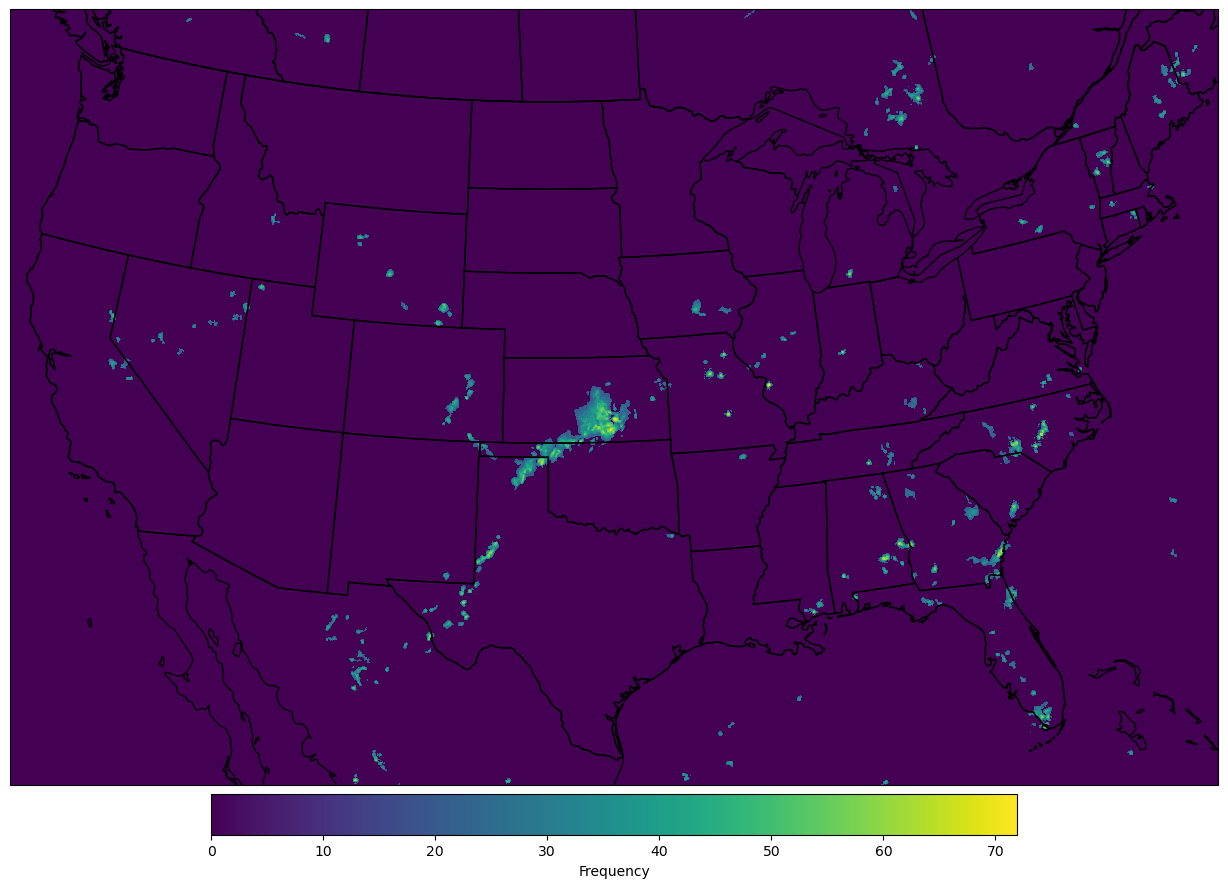

In [10]:
import matplotlib.pyplot as plt
import cartopy


fig = plt.figure()
fig.set_size_inches(16,12)
ax1 = fig.add_subplot(111, projection = cartopy.crs.LambertConformal(central_latitude = 40., central_longitude = -100.))


ax1.add_feature(cartopy.feature.STATES.with_scale('50m'), facecolor='none', zorder = 9)
ax1.add_feature(cartopy.feature.OCEAN)
ax1.add_feature(cartopy.feature.COASTLINE)
ax1.add_feature(cartopy.feature.BORDERS)

ax1.set_extent([-120,-75,23,50])

cfset = plt.pcolormesh(lon, lat, rad, transform=cartopy.crs.PlateCarree(), shading='auto')

#plt.title('Frequency of QLCS Storm Mode', fontsize = 'xx-large')
plt.colorbar(cfset, shrink=0.65, label='Frequency', location = 'bottom', pad= 0.01)

In [11]:
ds

<xarray.Dataset>
Dimensions:     (y: 1059, x: 1799)
Coordinates:
    time        datetime64[ns] 2020-08-10
    step        timedelta64[ns] 1 days
    atmosphere  float64 0.0
    latitude    (y, x) float64 21.14 21.15 21.15 21.16 ... 47.86 47.85 47.84
    longitude   (y, x) float64 237.3 237.3 237.3 237.4 ... 299.0 299.0 299.1
    valid_time  datetime64[ns] 2020-08-11
Dimensions without coordinates: y, x
Data variables:
    refc        (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    veril       (y, x) float32 ...
    hail        (y, x) float32 ...
    ltng        (y, x) float32 ...
    tcc         (y, x) float32 ...
    unknown     (y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-01-19T23:58 GRIB to CDM+CF via cfgrib-0.9.9...